In [ ]:
from numpy.random import uniform, normal, randint, rand
import numpy as np
import pandas as pd

def generate_dataset(seed):
    np.random.seed(seed)
    
    x = np.array([])
    y = np.array([])
    loop = randint(10,15)

    for i in range(loop):
        x = np.append(x, np.random.normal(randint(10), rand(), 20))
        y = np.append(y, np.random.normal(randint(10), rand(), 20))
        
    df = pd.DataFrame(data = {'x': x, 'y':y})
    df.to_csv('dataset.csv', index=False)

In [ ]:
student_id = 2440101490 #change this to your student id

generate_dataset(student_id)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df_filepath = "/content/dataset.csv"

In [ ]:
df = pd.read_csv(df_filepath, parse_dates = True)

In [ ]:
df.head()

,x,y
0,4.883896,1.179174
1,5.126003,-0.062323
2,5.069240,0.600656
3,4.625856,1.625574
4,3.904549,0.525688


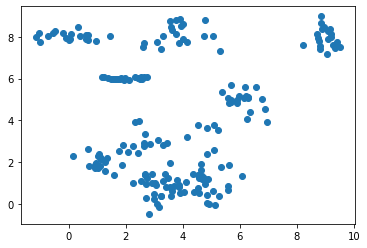

In [ ]:
plt.scatter(df['x'],df['y'])

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,x,y,test,cluster
0,4.883896,1.179174,0,1
1,5.126003,-0.062323,0,1
2,5.069240,0.600656,0,1
3,4.625856,1.625574,0,1
4,3.904549,0.525688,0,1


In [ ]:
km.cluster_centers_

array([[1.84364783, 7.37962379],
       [3.24207348, 1.55726616],
       [7.44528827, 6.51935466]])

Text(0, 0.5, 'y')

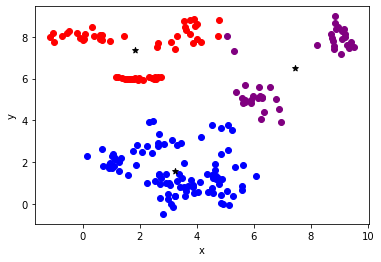

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]

plt.scatter(df1.x,df1['y'], color='red')
plt.scatter(df2.x,df2['y'], color='blue')
plt.scatter(df3.x,df3['y'], color='purple')
plt.scatter(df4.x,df4['y'], color='yellow')
plt.scatter(df5.x,df5['y'], color='green')
plt.scatter(df6.x,df6['y'], color='brown')
plt.scatter(df7.x,df7['y'], color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            color='black',marker='*',label='center')

plt.xlabel('x')
plt.ylabel('y')

In [ ]:
k_rng = range (1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['x','y']])
  sse.append(km.inertia_)

In [ ]:
sse

[3037.613445496725,
 1500.9321162976591,
 718.5269539431429,
 528.5778507019581,
 365.1765805247711,
 246.78071897646623,
 169.87735989623195,
 127.91634670948562,
 98.51231104406469]

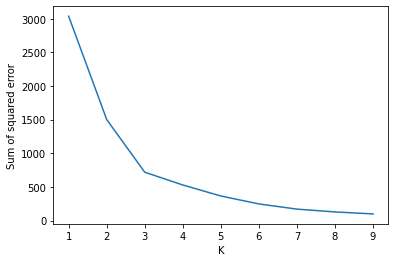

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)